In [1]:
# setup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Classifying movie reviews - Binary classification

## Get the data:

In [2]:
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import imdb

```
This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment
(positive/negative). Reviews have been preprocessed, and each review is
encoded as a list of word indexes (integers).
For convenience, words are indexed by overall frequency in the dataset,
so that for instance the integer "3" encodes the 3rd most frequent word in
the data. This allows for quick filtering operations such as:
"only consider the top 10,000 most
common words, but eliminate the top 20 most common words".
```

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape

(25000,)

In [5]:
type(train_data)

numpy.ndarray

In [6]:
train_data.dtype
# its NOT a 2D array. instead its every element is a python list.

dtype('O')

In [7]:
type(train_data[0])

list

In [8]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [9]:
for idx, i in enumerate(train_data):
    print(len(i))
    if idx == 5:
        break

218
189
141
550
147
43


So you notice that every python list has a different length. 

because ofcourse movie reviews are subjectively written, someone might right a 1 word review, another might write a whole paragraph in the review. 

therefore, it was not actually possible to create a 2D Numpy array because it would need fixed no. of elements on each axis.

`imdb.load_data(num_words=10000)`

in this , what num_words=10000 does is discard all words from a review which are not in the top 10000 most frequent words in the dataset. 

In [10]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
min([min(sequence) for sequence in train_data])

1

In [12]:
train_labels[:5]

array([1, 0, 0, 1, 0], dtype=int64)

0 stands for a negative review. 1 stands for a positive review.

**decoding reviews back to text**

In [13]:
word_index = imdb.get_word_index()

In [14]:
type(word_index)

dict

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

Note that the indices in the dataset are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

("unknown" could be words used in the reviews dataset that are not in the english dictionary)

therefore when dealing with this word index dictionary, you want to query (i-3) to match with the actual word in the dictionary.

In [16]:
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [17]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Prepare the data:

In [18]:
# encoding the integer sequences via multi-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
y_train = np.asarray(train_labels).astype("float32") # actually np.asarray() was not needed as train_labels and test_labels is already a numpy array with int64 elements.
y_test = np.asarray(test_labels).astype("float32")

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
# model architecture
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

In [25]:
# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [26]:
x_train.shape

(25000, 10000)

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Model Training:

We will now train the model for **20 epochs** (20 iterations over all samples in the training data(`partial_y_train`)) in **mini-batches of 512 samples**.

At the same time, we will monitor loss and accuracy on the 10,000 samples that we set apart.

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6997 - loss: 0.5997 - val_accuracy: 0.8532 - val_loss: 0.4182
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8892 - loss: 0.3572 - val_accuracy: 0.8790 - val_loss: 0.3243
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9154 - loss: 0.2606 - val_accuracy: 0.8883 - val_loss: 0.2910
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9355 - loss: 0.2051 - val_accuracy: 0.8753 - val_loss: 0.3088
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9482 - loss: 0.1682 - val_accuracy: 0.8785 - val_loss: 0.3026
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9545 - loss: 0.1472 - val_accuracy: 0.8880 - val_loss: 0.2830
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9652 - loss: 0.1210 - val_accuracy: 0.8857 - val_loss: 0.2921
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9710 - loss: 0.1037 - val_accuracy: 0.8832 - val_loss

## Evaluation:

In [29]:
loss_and_metrics = pd.DataFrame(history.history)

In [30]:
loss_and_metrics

,accuracy,loss,val_accuracy,val_loss
0,0.779333,0.530164,0.8532,0.418171
1,0.892533,0.334829,0.8790,0.324278
2,0.916533,0.252682,0.8883,0.291025
3,0.934333,0.203479,0.8753,0.308803
4,0.944933,0.169015,0.8785,0.302564
5,0.954267,0.145294,0.8880,0.282994
6,0.962400,0.124615,0.8857,0.292054
7,0.967133,0.107711,0.8832,0.305350
8,0.975400,0.092767,0.8826,0.321452
9,0.979600,0.079658,0.8715,0.350272


**NOTICE** val_accuracy falling after 4th epoch. and val_loss increasing after 4th epoch. 

The model is **overfitting** after 4th epoch.

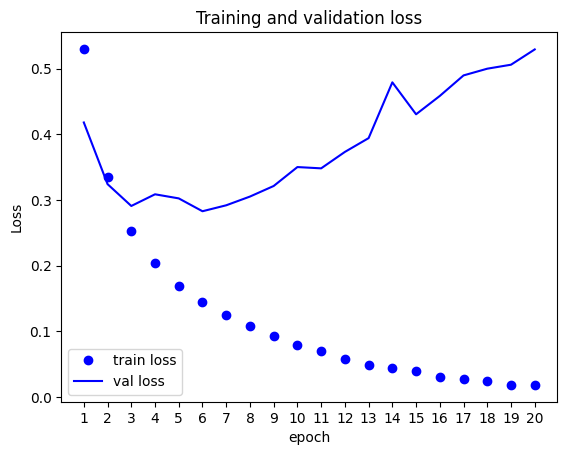

In [31]:
plt.plot(loss_and_metrics.index, loss_and_metrics.loss, "bo", label="train loss")
plt.plot(loss_and_metrics.index, loss_and_metrics.val_loss, "b-", label="val loss")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.xticks(ticks=np.arange(len(loss_and_metrics)), labels=np.arange(1, len(loss_and_metrics) + 1))
plt.legend()
plt.title('Training and validation loss')
plt.show()

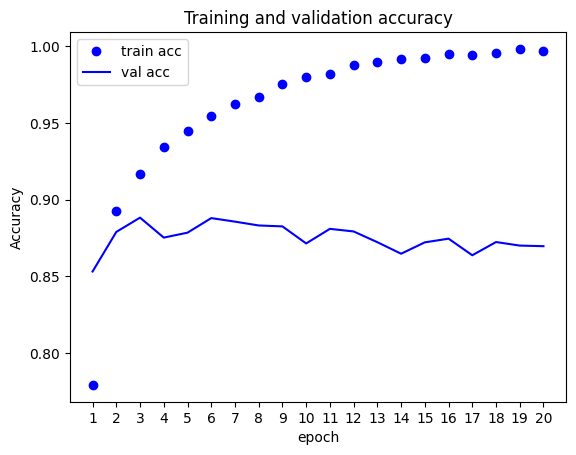

In [32]:
plt.plot(loss_and_metrics.index, loss_and_metrics.accuracy, "bo", label="train acc")
plt.plot(loss_and_metrics.index, loss_and_metrics.val_accuracy, "b-", label="val acc")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.xticks(ticks=np.arange(len(loss_and_metrics)), labels=np.arange(1, len(loss_and_metrics) + 1))
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

## Final model training and evaluation on test data:

Lets train a new model from scratch for 4 epochs and then evaluate it on the test data.

In [33]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

In [34]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [35]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7353 - loss: 0.5470
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9100 - loss: 0.2718
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9302 - loss: 0.2049
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9396 - loss: 0.1716


In [36]:
result = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.8793 - loss: 0.2971


In [37]:
type(result)

list

In [38]:
result

[0.2934325337409973, 0.8831599950790405]

result represents [test_loss, test_accuracy]

In [39]:
print(f"The final model has accuracy of {result[1] * 100:.2f}%")

The final model has accuracy of 88.32%
